In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

In [2]:
EN_path = ("/kaggle/input/wikipedia-structured-contents/enwiki_namespace_0")

In [1]:
import pandas as pd

EN_PATH = "/kaggle/input/wikipedia-structured-contents/enwiki_namespace_0/enwiki_namespace_0_0.jsonl"

# read the file in chunks
chunksize = 10000   # 10k rows per chunk
reader = pd.read_json(EN_PATH, lines=True, chunksize=chunksize)

# take only the first chunk
df = next(reader)

print("Shape:", df.shape)
print("Columns:", df.columns)
df.head(3)


Shape: (10000, 17)
Columns: Index(['name', 'identifier', 'version', 'event', 'url', 'date_created',
       'date_modified', 'is_part_of', 'in_language', 'license', 'description',
       'sections', 'abstract', 'main_entity', 'additional_entities',
       'infoboxes', 'image'],
      dtype='object')


,name,identifier,version,event,url,date_created,date_modified,is_part_of,in_language,license,description,sections,abstract,main_entity,additional_entities,infoboxes,image
0,Not Again SU,76716259,"{'identifier': 1220413474, 'comment': 'Added #...",{'identifier': 'fa3cae5b-8707-4f55-9fab-5baa4c...,https://en.wikipedia.org/wiki/Not_Again_SU,2024-04-23T16:50:32Z,2024-04-23T16:53:55Z,"{'identifier': 'enwiki', 'url': 'https://en.wi...",{'identifier': 'en'},[{'name': 'Creative Commons Attribution-ShareA...,"Student organization in Syracuse, New York","[{'type': 'section', 'name': 'Abstract'}, {'ty...",NaN,NaN,NaN,NaN,NaN
1,Mike Ross (Suits),76727681,"{'identifier': 1220574416, 'comment': 'Request...",{'identifier': '22366970-ddf7-43dc-8cec-941de1...,https://en.wikipedia.org/wiki/Mike_Ross_(Suits),2024-04-24T17:12:05Z,2024-04-24T17:14:10Z,"{'identifier': 'enwiki', 'url': 'https://en.wi...",{'identifier': 'en'},[{'name': 'Creative Commons Attribution-ShareA...,An American Legal drama series from 2011-2019,"[{'type': 'section', 'name': 'Abstract', 'has_...",REDIRECT List of Suits characters#Mike Ross,"{'identifier': 'Q125388612', 'url': 'https://w...","[{'identifier': 'Q125388612', 'url': 'https://...",NaN,NaN
2,Second Polish republic,76744378,"{'identifier': 1220875620, 'comment': '[[WP:AE...",{'identifier': '552624d6-5c55-45ef-a8e3-945335...,https://en.wikipedia.org/wiki/Second_Polish_re...,2024-04-26T13:30:10Z,2024-04-26T13:30:10Z,"{'identifier': 'enwiki', 'url': 'https://en.wi...",{'identifier': 'en'},[{'name': 'Creative Commons Attribution-ShareA...,Country in Central and Eastern Europe (1918–1939),"[{'type': 'section', 'name': 'Abstract', 'has_...",REDIRECT #Second Polish Republic,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 10000 non-null  object
 1   identifier           10000 non-null  int64 
 2   version              10000 non-null  object
 3   event                10000 non-null  object
 4   url                  10000 non-null  object
 5   date_created         239 non-null    object
 6   date_modified        10000 non-null  object
 7   is_part_of           10000 non-null  object
 8   in_language          10000 non-null  object
 9   license              10000 non-null  object
 10  description          8130 non-null   object
 11  sections             9997 non-null   object
 12  abstract             9955 non-null   object
 13  main_entity          9844 non-null   object
 14  additional_entities  9847 non-null   object
 15  infoboxes            7378 non-null   object
 16  image

In [3]:
df.isnull().sum()

name                      0
identifier                0
version                   0
event                     0
url                       0
date_created           9761
date_modified             0
is_part_of                0
in_language               0
license                   0
description            1870
sections                  3
abstract                 45
main_entity             156
additional_entities     153
infoboxes              2622
image                  7515
dtype: int64

In [5]:
print(df["description"].dropna().head(5))
print(df["abstract"].dropna().head(5))


0           Student organization in Syracuse, New York
1        An American Legal drama series from 2011-2019
2    Country in Central and Eastern Europe (1918–1939)
3          Convention of symbols representing language
4                      List of events in the year 1442
Name: description, dtype: object
1          REDIRECT List of Suits characters#Mike Ross
2                     REDIRECT #Second Polish Republic
3               REDIRECT Writing system#Directionality
4                  Events from the year 1442 in France
5    Juan Benet is an American computer scientist. ...
Name: abstract, dtype: object


In [6]:
print("\nLanguages:\n",df["in_language"].value_counts())


Languages:
 in_language
{'identifier': 'en'}    10000
Name: count, dtype: int64


In [7]:
df["desc_length"]= df["description"].dropna().apply(len)
print("Avg description length:", df["desc_length"].mean())
print("Max description length:", df["desc_length"].max())



Avg description length: 27.946986469864697
Max description length: 94.0


In [8]:
df["abstract_length"] = df["abstract"].dropna().apply(len)
print("Avg abstract length:", df["abstract_length"].mean())
print("Max abstract length:", df["abstract_length"].max())


Avg abstract length: 392.4015067805123
Max abstract length: 10991.0


In [9]:
longest = df.loc[df["abstract_length"].idxmax(), "abstract"]
print("\nLongest abstract sample:\n", longest)



Longest abstract sample:
 Ann Weaver Norton was an American sculptor and writer of children's books. Norton was born in Selma, Alabama, the daughter of William Minter Weaver II and Edith Vaughan Weaver. She showed early talent for art, most likely influenced by her two aunts, Clara Weaver Parrish and Rose Pettus Weaver, who were artists themselves. Weaver Parrish had studied at the Art Students League in New York City under William Merritt Chase, exhibited at the Paris Exposition in 1900 and worked with stained glass at the Tiffany Studios. She later returned to Alabama, organizing exhibitions of southern women artists. Rose Weaver most likely studied in New York as well, and had a career as a sculptor in wood. After graduating from high school, in an attempt to earn money to attend art school Norton wrote and illustrated three children's books – Frawg (1930), Boochy's Wings (1931), and Pappy King (1932) – while vacationing at the family summer home near Sardis. She attended Smith Col

In [11]:
from collections import Counter
import re

all_text = " ".join(df["description"].dropna().astype(str).values)
words = re.findall(r"\b\w+\b", all_text.lower())
common_words = Counter(words).most_common(20)

print("\nMost common words in descriptions:\n", common_words)


Most common words in descriptions:
 [('of', 1450), ('season', 1289), ('in', 1211), ('football', 1107), ('the', 977), ('by', 898), ('american', 662), ('species', 599), ('to', 591), ('same', 575), ('term', 554), ('topics', 551), ('referred', 551), ('tennis', 504), ('college', 440), ('tournament', 418), ('event', 412), ('and', 362), ('league', 355), ('results', 321)]


In [12]:
import json
df_info = df.dropna(subset=["infoboxes"]).copy()
print("number of rows with infoboxes: ", len(df_info))


number of rows with infoboxes:  7378


In [13]:
sample = df_info["infoboxes"].iloc[0]
print("\nrow infobox:", sample)



row infobox: [{'type': 'infobox', 'name': 'Year in France header', 'has_parts': [{'type': 'section', 'has_parts': [{'type': 'image', 'images': [{'content_url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Royal_flag_of_France.svg/80px-Royal_flag_of_France.svg.png', 'width': 80, 'height': 80}], 'links': [{'url': 'https://en.wikipedia.org/wiki/1441_in_France', 'text': '1441'}, {'url': 'https://en.wikipedia.org/wiki/1440_in_France', 'text': '1440'}, {'url': 'https://en.wikipedia.org/wiki/1439_in_France', 'text': '1439'}, {'url': 'https://en.wikipedia.org/wiki/1438_in_France', 'text': '1438'}, {'url': 'https://en.wikipedia.org/wiki/1437_in_France', 'text': '1437'}, {'url': 'https://en.wikipedia.org/wiki/AD_1442', 'text': '1442'}, {'url': 'https://en.wikipedia.org/wiki/France', 'text': 'France'}, {'url': 'https://en.wikipedia.org/wiki/1443_in_France', 'text': '1443'}, {'url': 'https://en.wikipedia.org/wiki/1444_in_France', 'text': '1444'}, {'url': 'https://en.wikipedia.org/wi

In [15]:
# take first row with infobox
sample = df_info["infoboxes"].iloc[0]

# it's a list, so check first element
first_box = sample[0]

print("Type of sample:", type(sample))
print("Keys of first infobox:", first_box.keys())

# look inside properties
if "properties" in first_box:
    print("\nProperties:\n", first_box["properties"].keys())


Type of sample: <class 'list'>
Keys of first infobox: dict_keys(['type', 'name', 'has_parts'])


In [16]:
facts = []
for _, row in df_info.iterrows():
    entity = row["name"]
    for box in row["infoboxes"]:
        if"propertise" in box:
            for prop, value in box["propertise"].item():
                facts.append({
                    "entity": entity,
                    "Relation": prop,
                    "Value": value
                })


facts_df = pd.DataFrame(facts)
print("Extracted facts shape:",facts_df.shape)
facts_df.head(10)

Extracted facts shape: (0, 0)


""


In [19]:
print(facts_df.columns)
facts_df.head(3)


RangeIndex(start=0, stop=0, step=1)


""


In [21]:
for _, row in df_info.iterrows():
    for box in row["infoboxes"]:
        if "properties" in box:
            ...


In [22]:
sample = df_info["infoboxes"].iloc[0]
print("Sample type:", type(sample))
print("Sample content:", sample)


Sample type: <class 'list'>
Sample content: [{'type': 'infobox', 'name': 'Year in France header', 'has_parts': [{'type': 'section', 'has_parts': [{'type': 'image', 'images': [{'content_url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Royal_flag_of_France.svg/80px-Royal_flag_of_France.svg.png', 'width': 80, 'height': 80}], 'links': [{'url': 'https://en.wikipedia.org/wiki/1441_in_France', 'text': '1441'}, {'url': 'https://en.wikipedia.org/wiki/1440_in_France', 'text': '1440'}, {'url': 'https://en.wikipedia.org/wiki/1439_in_France', 'text': '1439'}, {'url': 'https://en.wikipedia.org/wiki/1438_in_France', 'text': '1438'}, {'url': 'https://en.wikipedia.org/wiki/1437_in_France', 'text': '1437'}, {'url': 'https://en.wikipedia.org/wiki/AD_1442', 'text': '1442'}, {'url': 'https://en.wikipedia.org/wiki/France', 'text': 'France'}, {'url': 'https://en.wikipedia.org/wiki/1443_in_France', 'text': '1443'}, {'url': 'https://en.wikipedia.org/wiki/1444_in_France', 'text': '1444'}, {'url'

In [23]:
facts = []

for _, row in df_info.iterrows():
    entity = row["name"]
    
    for box in row["infoboxes"]:
        # look at all keys in each box
        for k, v in box.items():
            if isinstance(v, dict):  # nested dict (like properties)
                for subk, subv in v.items():
                    facts.append({"Entity": entity, "Relation": subk, "Value": subv})
            else:
                facts.append({"Entity": entity, "Relation": k, "Value": v})

facts_df = pd.DataFrame(facts)
print("Extracted facts shape:", facts_df.shape)
facts_df.head(10)


Extracted facts shape: (22915, 3)


,Entity,Relation,Value
0,1442 in France,type,infobox
1,1442 in France,name,Year in France header
2,1442 in France,has_parts,"[{'type': 'section', 'has_parts': [{'type': 'i..."
3,Juan Benet (computer scientist),type,infobox
4,Juan Benet (computer scientist),name,Infobox person
5,Juan Benet (computer scientist),has_parts,"[{'type': 'section', 'name': 'Juan Benet', 'ha..."
6,1906 Minnesota Senate election,type,infobox
7,1906 Minnesota Senate election,name,Infobox election
8,1906 Minnesota Senate election,has_parts,"[{'type': 'section', 'name': '1906 Minnesota S..."
9,12th century in Wales,type,infobox


In [24]:
facts = []

for _, row in df_info.iterrows():
    entity = row["name"]   # page title
    
    # skip if infobox is not a list
    if not isinstance(row["infoboxes"], list):
        continue
    
    for box in row["infoboxes"]:
        if not isinstance(box, dict):
            continue
        
        # Case 1: properties inside box
        if "properties" in box and isinstance(box["properties"], dict):
            for prop, value in box["properties"].items():
                facts.append({
                    "Entity": entity,
                    "Relation": prop,
                    "Value": value
                })
        
        # Case 2: direct key-value pairs in box
        else:
            for k, v in box.items():
                if k != "name":  # skip generic "Infobox person" etc.
                    facts.append({
                        "Entity": entity,
                        "Relation": k,
                        "Value": v
                    })

# Build DataFrame
facts_df = pd.DataFrame(facts)
print("Extracted facts shape:", facts_df.shape)
facts_df.head(10)


Extracted facts shape: (15380, 3)


,Entity,Relation,Value
0,1442 in France,type,infobox
1,1442 in France,has_parts,"[{'type': 'section', 'has_parts': [{'type': 'i..."
2,Juan Benet (computer scientist),type,infobox
3,Juan Benet (computer scientist),has_parts,"[{'type': 'section', 'name': 'Juan Benet', 'ha..."
4,1906 Minnesota Senate election,type,infobox
5,1906 Minnesota Senate election,has_parts,"[{'type': 'section', 'name': '1906 Minnesota S..."
6,12th century in Wales,type,infobox
7,12th century in Wales,has_parts,"[{'type': 'section', 'has_parts': [{'type': 'f..."
8,Li Cong (astronaut),type,infobox
9,Li Cong (astronaut),has_parts,"[{'type': 'section', 'name': 'Li Cong'}, {'typ..."


In [25]:
relation_counts = facts_df["Relation"].value_counts().head(20)
print("Top 20 relations:\n", relation_counts)


Top 20 relations:
 Relation
type         7691
has_parts    7689
Name: count, dtype: int64


In [26]:
occupation_facts = facts_df[facts_df["Relation"] == "Occupation"]
print("Sample Occupations:\n", occupation_facts.head(10))


Sample Occupations:
 Empty DataFrame
Columns: [Entity, Relation, Value]
Index: []


In [27]:
ny_births = facts_df[
    (facts_df["Relation"] == "Born") & 
    (facts_df["Value"].astype(str).str.contains("New York", case=False))
]

print("Entities born in New York:\n", ny_births.head(10))


Entities born in New York:
 Empty DataFrame
Columns: [Entity, Relation, Value]
Index: []


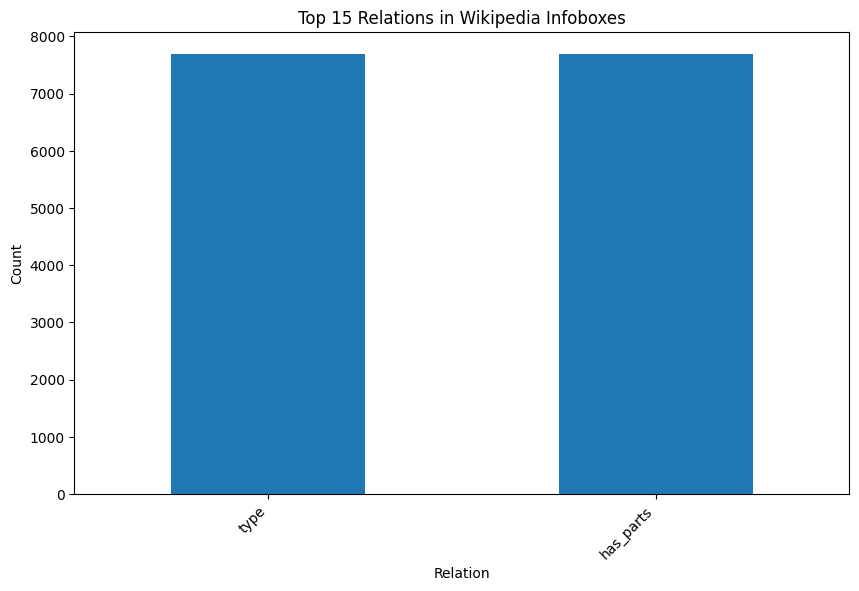

In [28]:
import matplotlib.pyplot as plt

# get top 15 relations
top_relations = facts_df["Relation"].value_counts().head(15)

# plot
plt.figure(figsize=(10,6))
top_relations.plot(kind="bar")
plt.title("Top 15 Relations in Wikipedia Infoboxes")
plt.xlabel("Relation")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26446 (\N{CJK UNIFIED IDEOGRAPH-674E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32874 (\N{CJK UNIFIED IDEOGRAPH-806A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32880 (\N{CJK UNIFIED IDEOGRAPH-8070}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


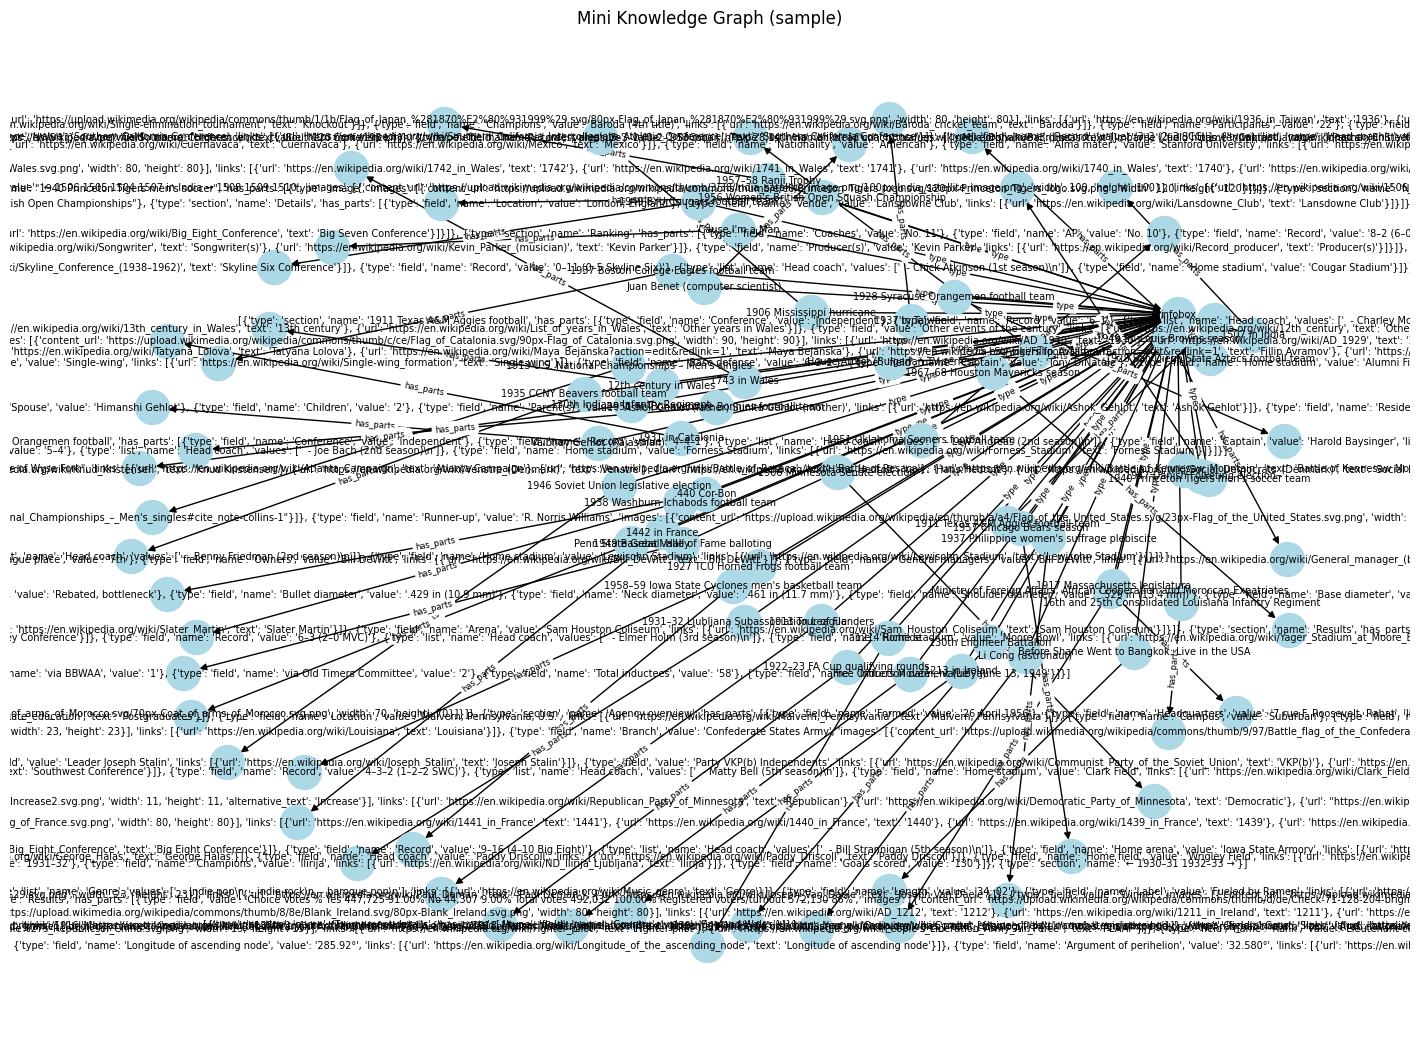

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# take a sample
sample_facts = facts_df.head(100).copy()

# clean values: keep only simple strings/numbers
def clean_value(v):
    if isinstance(v, (str, int, float)):
        return v
    return str(v)  # convert lists/dicts to string

sample_facts["Value"] = sample_facts["Value"].apply(clean_value)

# build graph
G = nx.from_pandas_edgelist(
    sample_facts,
    source="Entity",
    target="Value",
    edge_attr="Relation",
    create_using=nx.DiGraph()
)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)

nx.draw(G, pos, with_labels=True, node_size=600, node_color="lightblue", font_size=7, arrows=True)
edge_labels = nx.get_edge_attributes(G, "Relation")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Mini Knowledge Graph (sample)")
plt.show()


In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'


In [32]:
!apt-get -y install fonts-noto-cjk
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans CJK JP'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1
Ign:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1
Ign:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1
Err:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1
  Temporary failure resolving 'archive.ubuntu.com'
E: Failed to fetch http://archive.ubuntu.com/ubuntu/pool/main/f/fonts-noto-cjk/fonts-noto-cjk_20220127%2brepack1-1_all.deb  Temporary failure resolving 'archive.ubuntu.com'
E: Unable to fetch some

In [34]:
# pick an entity you know is in the data
entity = "Barack Obama"

if entity in G:
    print("Neighbors of", entity, ":", list(G.neighbors(entity)))
    
    # show relation labels too
    for neighbor in G.neighbors(entity):
        relation = G[entity][neighbor]["Relation"]
        print(f"{entity} --{relation}--> {neighbor}")
else:
    print(entity, "not found in graph")


Barack Obama not found in graph


In [35]:
actors = facts_df[
    (facts_df["Relation"] == "Occupation") &
    (facts_df["Value"].astype(str).str.contains("actor", case=False))
]

print("Sample actors:\n", actors.head(10))


Sample actors:
 Empty DataFrame
Columns: [Entity, Relation, Value]
Index: []


In [36]:
born_in_ny = facts_df[
    (facts_df["Relation"] == "Born") &
    (facts_df["Value"].astype(str).str.contains("New York", case=False))
]

print("Entities born in New York:\n", born_in_ny.head(10))


Entities born in New York:
 Empty DataFrame
Columns: [Entity, Relation, Value]
Index: []


In [37]:
facts_df.to_csv("wikipedia_facts.csv", index=False)
print("Saved to wikipedia_facts.csv")


Saved to wikipedia_facts.csv


In [38]:
facts_df[(facts_df["Relation"]=="Occupation") & (facts_df["Value"].astype(str).str.contains("actor", case=False))]["Entity"].head(10).tolist()


[]

In [39]:
facts_df[(facts_df["Relation"]=="Born") & (facts_df["Value"].astype(str).str.contains("New York", case=False))]["Entity"].head(10).tolist()


[]

In [40]:
facts_df[facts_df["Relation"]=="Spouse"]["Entity"].head(10).tolist()


[]

In [41]:
facts_df[(facts_df["Relation"].str.contains("Office", case=False)) & (facts_df["Value"].astype(str).str.contains("President", case=False))]["Entity"].head(10).tolist()


[]

In [42]:
facts_df[(facts_df["Relation"]=="Died") & (facts_df["Value"].astype(str).str.contains("in", case=False))]["Entity"].head(10).tolist()


[]

In [43]:
facts_df[facts_df["Relation"]=="Nationality"]["Entity"].head(10).tolist()


[]

In [44]:
facts_df[facts_df["Relation"]=="Education"]["Entity"].head(10).tolist()


[]

IndexError: index 0 is out of bounds for axis 0 with size 0

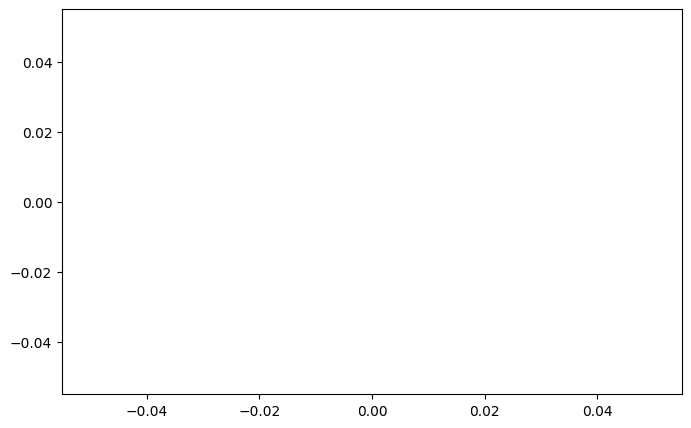

In [45]:
import matplotlib.pyplot as plt

top_occupations = (
    facts_df[facts_df["Relation"]=="Occupation"]["Value"]
    .value_counts()
    .head(10)
)

top_occupations.plot(kind="barh", figsize=(8,5))
plt.title("Top 10 Occupations in Wikipedia Dataset")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()


In [46]:
print(facts_df["Relation"].value_counts().head(20))


Relation
type         7691
has_parts    7689
Name: count, dtype: int64


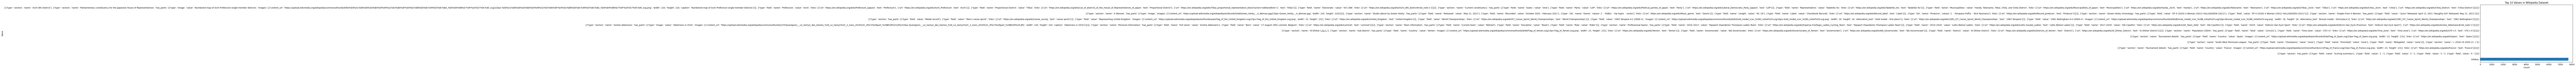

In [47]:
import matplotlib.pyplot as plt

top_values = facts_df["Value"].value_counts().head(10)

top_values.plot(kind="barh", figsize=(8,5))
plt.title("Top 10 Values in Wikipedia Dataset")
plt.xlabel("Count")
plt.ylabel("Value")
plt.show()

